In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
x = np.array([3.5,1.1,3.2,2.8,6.7,4.4,0.9,2.2])
np.mean(x)

3.1

In [4]:
np.median(x)

3.0

In [5]:
x.min(), x.max()

(0.9, 6.7)

In [6]:
x.var()

3.0700000000000007

In [7]:
x.std()

1.7521415467935233

In [8]:
x.var(ddof=1)

3.5085714285714293

In [9]:
x.std(ddof=1)

1.8731181032095732

In [10]:
#liczby losowe
np.random.randint(10,size=10)

array([0, 9, 1, 6, 1, 7, 7, 7, 6, 5])

In [11]:
np.random.randint(low=10,high=20,size=(2,10))

array([[19, 15, 17, 19, 18, 18, 12, 12, 15, 13],
 [10, 14, 14, 14, 18, 16, 16, 11, 16, 19]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

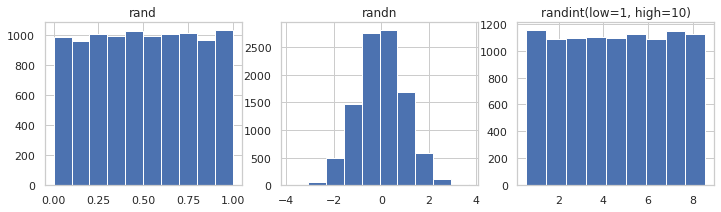

In [12]:
fig,axes = plt.subplots(1,3,figsize=(12,3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1,high=10,size=10000),bins=9,align='left')
axes[2].set_title("randint(low=1, high=10)")

In [21]:
np.random.seed(123)
np.random.choice(10,5,replace=False)

array([4, 0, 7, 5, 8])

In [28]:
prng = np.random.RandomState(123456)
prng.randn(2,4)

array([[ 0.4691123 , -0.28286334, -1.5090585 , -1.13563237],
 [ 1.21211203, -0.17321465, 0.11920871, -1.04423597]])

In [30]:
prng.chisquare(1,size=(2,2))

array([[2.47196274, 0.04276481],
 [0.71938874, 0.23180551]])

In [31]:
prng.standard_t(1,size=(2,3))

array([[ 0.70628038, 2.38731501, -2.05593833],
 [ 1.48934807, 0.60973704, -0.78649795]])

In [32]:
prng.exponential(3,size=(5,5))

array([[0.31520422, 3.97950877, 0.0500487 , 1.96977756, 0.30257491],
 [2.06332292, 5.475259 , 6.82880114, 3.9569337 , 4.26544584],
 [2.4674258 , 1.91301213, 0.44817448, 0.29767524, 8.55522509],
 [0.43195492, 2.98843424, 3.06135771, 1.7047805 , 0.50826478],
 [5.95477283, 3.44699873, 0.2688188 , 2.50484102, 0.48693869]])

In [34]:
#testowanie hipotez statystycznych
#hipoteza zerowa: zmienna losowa x ma średnią (mi) = 1. 
#Na odstawie próbek X chcemy sprawdzić czy dane są zgodne z hipotezą zerową

mu_0, mu, sigma = 1.0, 0.8,0.5
X = stats.norm(mu,sigma)
n=100
X_samples = X.rvs(n)

In [35]:
#liczym statystykę testową
z = (X_samples.mean()-mu_0)/(sigma/np.sqrt(n))
z

-5.666776690076045

In [36]:
t = (X_samples.mean()-mu_0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-5.108789840309789

In [37]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [38]:
2*stats.norm().cdf(-abs(z))

1.4550877916848562e-08

In [39]:
2*stats.t(df=(n-1)).cdf(-abs(t))

1.5778230541086637e-06

In [40]:
t,p = stats.ttest_1samp(X_samples,mu)
t

-1.5026552634830248

In [41]:
p

0.13611116415341362

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


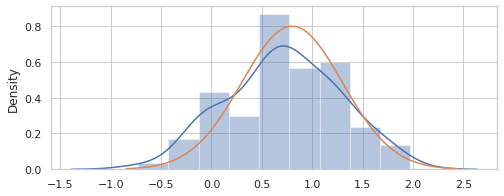

In [44]:
fig,ax= plt.subplots(figsize=(8,3))
sns.distplot(X_samples,ax=ax)
x = np.linspace(*X.interval(0.999),num=100)
ax.plot(x,stats.norm(loc=mu,scale=sigma).pdf(x))